In [5]:
import numpy as np                #math stuff
import scipy.stats as st          #more math stuff
import pandas as pd               #dataframes
import matplotlib.pyplot as plt   #plotting stuff -- next line makes it inline but you can't put a comment there
%matplotlib inline
import seaborn as sns             #pretty plotting (like ggplot2 instead of base graphics in R)
sns.set()                         #initialize

#I took the code for the qq plot from R, so I also need to import rpy2:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
pandas2ri.activate()

# What are the odds of obtaining 3 false positives with p = 0.05, given 40 tests under the null?

## First, we need to pick a test and simulate data.  Let's use a t-test and simulate some normally distributed data.

In [140]:
st.norm.rvs(loc=0,scale=1,size=20)

array([-0.30266156,  0.35389883,  1.70843614,  0.07971568, -0.31996984,
        0.22213262, -0.43094162,  0.08539669,  0.81318971, -0.43655852,
       -0.15279555, -0.24977311, -0.38751584,  0.14493446, -0.85106018,
       -0.51630203,  0.02048517, -1.18221404, -1.52734689, -2.01729817])

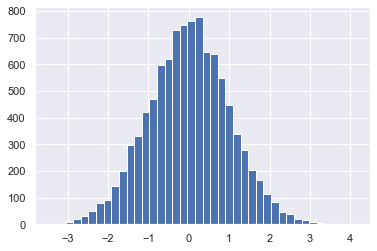

In [7]:
n, bins, patches = plt.hist(st.norm.rvs(loc=0,scale=1,size=10000),40)

Looks like this gives us normally distributed data!

## Now let's simulate two groups of normally distributed data under the null and perform a t-test:

##### Note: What is the difference between a Student's t-test and Welch's t-test?  1-sided or 2?

In [30]:
dataA = st.norm.rvs(loc=0,scale=1,size=20)
dataB = st.norm.rvs(loc=0,scale=1,size=20)
statistic, pvalue = st.ttest_ind(dataA,dataB,equal_var=False)
print(statistic,pvalue)

-0.4065402296476529 0.6871674942827143


## Seems to be working but the p-value changes from simulation to simulation, so let's check the distribution of p-values:

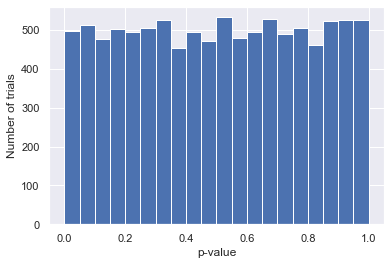

In [31]:
num_tests = 10000
pvalue_list = []
for i in range(num_tests): #range(N) = [0,1,2,3,...,N]
    dataA = st.norm.rvs(loc=0,scale=1,size=20)
    dataB = st.norm.rvs(loc=0,scale=1,size=20)
    statistic, pvalue = st.ttest_ind(dataA,dataB,equal_var=False)
    pvalue_list.append(pvalue)

n, bins, patches = plt.hist(pvalue_list,20)
plt.xlabel('p-value')
plt.ylabel('Number of trials')
plt.show()

This is more or less uniform, which is what we expected.

## Now we can start to answer our question: How many false positives do we get in an experiment with N=40 tests?

In [148]:
num_tests = 40
num_false_positives = 0
for i in range(num_tests): #range(N) = [0,1,2,3,...,N]
    dataA = st.norm.rvs(loc=0,scale=1,size=20)
    dataB = st.norm.rvs(loc=0,scale=1,size=20)
    statistic, pvalue = st.ttest_ind(dataA,dataB,equal_var=False)
    if pvalue < 0.05:
        num_false_positives+=1

print(str(num_false_positives)+" false positives")

0 false positives


## And if we try this experiment many times, how often do we get 0, 1, 2,... false positives?

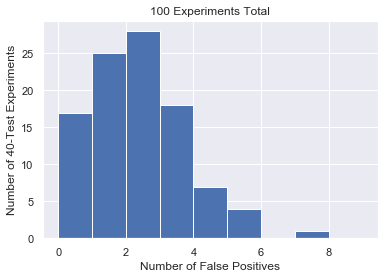

In [34]:
num_experiments = 100  #let's do this 40-test experiment a bunch of times
num_false_positives_list = []
for k in range(num_experiments):
    num_tests = 40
    num_false_positives = 0
    for i in range(num_tests): #range(N) = [0,1,2,3,...,N]
        dataA = st.norm.rvs(loc=0,scale=1,size=20)
        dataB = st.norm.rvs(loc=0,scale=1,size=20)
        statistic, pvalue = st.ttest_ind(dataA,dataB,equal_var=False)
        if pvalue < 0.05:
            num_false_positives+=1
    num_false_positives_list.append(num_false_positives)
    
plt.hist(num_false_positives_list,bins = [0,1,2,3,4,5,6,7,8,9])
plt.xlabel('Number of False Positives')
plt.ylabel('Number of '+str(num_tests)+'-Test Experiments')
plt.title(str(num_experiments)+' Experiments Total')
plt.show()

In [35]:
num_false_positives_array = np.array(num_false_positives_list)
len(num_false_positives_array[num_false_positives_array>2])

30

## Conclusion: It's very common to have more than 2 false positives.

# What Does the Distribution of P-Values Look Like Under the Alternate?

## Distribution of P-Values

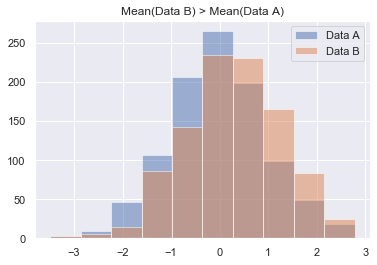

In [74]:
dataA = st.norm.rvs(loc=0,scale=1,size=1000)
dataB = st.norm.rvs(loc=0.25,scale=1,size=1000) #The mean for dataB is now different from dataA
n,bins,patches = plt.hist(dataA,label = 'Data A',alpha=0.5)
plt.hist(dataB,bins=bins,label = 'Data B',alpha=0.5)
plt.legend()
plt.title('Mean(Data B) > Mean(Data A)')
plt.show()

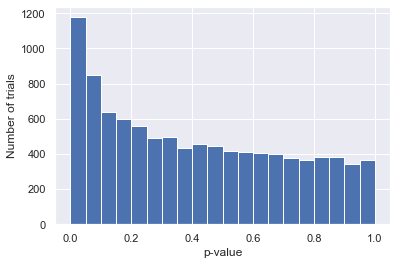

In [36]:
#I copied 1.3 below and only changed one line:

num_tests = 10000
pvalue_list = []
for i in range(num_tests):
    dataA = st.norm.rvs(loc=0,scale=1,size=20)
    dataB = st.norm.rvs(loc=0.25,scale=1,size=20) #The mean for dataB is now different from dataA
    statistic, pvalue = st.ttest_ind(dataA,dataB,equal_var=False)
    pvalue_list.append(pvalue)

n, bins, patches = plt.hist(pvalue_list,20)
plt.xlabel('p-value')
plt.ylabel('Number of trials')
plt.show()

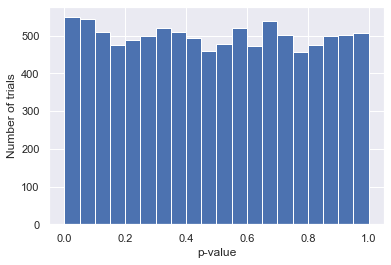

In [37]:
#If the difference between distributions is small:

num_tests = 10000
pvalue_list = []
for i in range(num_tests):
    dataA = st.norm.rvs(loc=0,scale=1,size=20)
    dataB = st.norm.rvs(loc=0.05,scale=1,size=20) #The mean for dataB is now different from dataA
    statistic, pvalue = st.ttest_ind(dataA,dataB,equal_var = False)
    pvalue_list.append(pvalue)

n, bins, patches = plt.hist(pvalue_list,20)
plt.xlabel('p-value')
plt.ylabel('Number of trials')
plt.show()

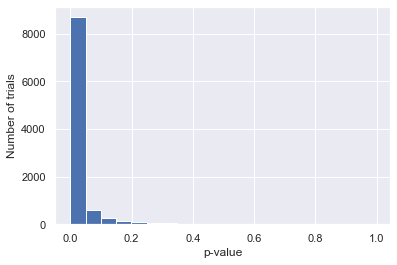

In [38]:
#If the difference between distributions is large:

num_tests = 10000
pvalue_list = []
for i in range(num_tests):
    dataA = st.norm.rvs(loc=0,scale=1,size=20)
    dataB = st.norm.rvs(loc=1,scale=1,size=20) #The mean for dataB is now different from dataA
    statistic, pvalue = st.ttest_ind(dataA,dataB,equal_var = False)
    pvalue_list.append(pvalue)

n, bins, patches = plt.hist(pvalue_list,20)
plt.xlabel('p-value')
plt.ylabel('Number of trials')
plt.show()

## This Is Also Commonly Viewed as a Q-Q Plot:

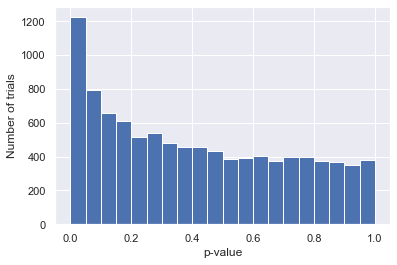

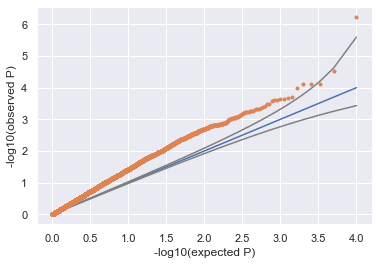

In [138]:
def qqPlot(pvals):
    pvals = np.array(pvals)
    pvals = pvals[~pd.isnull(pvals)]
    n = len(pvals)
    xvals = np.arange(1.,n+1)
    obs = np.sort(pvals)
    exp = xvals/n
    robjects.globalenv['xvals']=np.resize(xvals,[len(xvals),1])
    robjects.globalenv['pvals']=np.resize(pvals,[len(pvals),1])
    upper = robjects.r('qbeta(0.025,xvals,rev(xvals))')
    upper.resize(len(upper))
    lower = robjects.r('qbeta(0.975,xvals,rev(xvals))')
    lower.resize(len(lower))
    min_val = min(-np.log10(exp))
    max_val = max(-np.log10(exp))
    plt.plot([min_val,max_val],[min_val,max_val])
    plt.plot(-np.log10(exp),-np.log10(upper),c='grey')
    plt.plot(-np.log10(exp),-np.log10(lower),c='grey')
    plt.plot(-np.log10(exp),-np.log10(obs),'.')
    plt.xlabel('-log10(expected P)')
    plt.ylabel('-log10(observed P)')
    plt.show()
    
    return



num_tests = 10000
pvalue_list = []
for i in range(num_tests):
    dataA = st.norm.rvs(loc=0,scale=1,size=20)
    dataB = st.norm.rvs(loc=0.25,scale=1,size=20) #The mean for dataB is now different from dataA
    statistic, pvalue = st.ttest_ind(dataA,dataB,equal_var = False)
    pvalue_list.append(pvalue)

n, bins, patches = plt.hist(pvalue_list,20)
plt.xlabel('p-value')
plt.ylabel('Number of trials')
plt.show()

qqPlot(pvalue_list)

In [40]:
#Let's look at the adjusted p-values (FDR/BH):
pvalue_list = np.array(pvalue_list)
robjects.globalenv['pvalue_list']=np.resize(pvalue_list,[len(pvalue_list),1])
adjusted_pvalues = robjects.r('p.adjust(pvalue_list,"BH")') #p.adjust is the R command, "BH" or "fdr" give false discovery rate
print(sorted(pvalue_list)[0:10])
print(sorted(adjusted_pvalues)[0:10])
print(sorted(pvalue_list*len(pvalue_list))[0:10]) #This is a bonferroni correction but the option also exists in p.adjust

[1.445532258920859e-05, 5.468047511056628e-05, 6.637836624398317e-05, 6.876944626812615e-05, 6.949855147799233e-05, 7.311567530442973e-05, 7.874675826501613e-05, 0.00010403869844640092, 0.00010409889229731306, 0.00011078562599206444]
[0.09558786661954413, 0.09558786661954413, 0.09558786661954413, 0.09558786661954413, 0.09558786661954413, 0.09558786661954413, 0.09558786661954413, 0.09558786661954413, 0.09558786661954413, 0.09558786661954413]
[0.1445532258920859, 0.5468047511056627, 0.6637836624398318, 0.6876944626812616, 0.6949855147799233, 0.7311567530442973, 0.7874675826501614, 1.0403869844640092, 1.0409889229731306, 1.1078562599206443]


These numbers were pasted into the PPT (it's prettier there)

# Permutation Test Example

In [139]:
GroupA = [35,12,18,90,10632,1,16]
GroupB = [62,39,9,110,33,29,17]
print(np.median(GroupA)-np.median(GroupB))

-15.0


In [132]:
def permute_test(GroupA,GroupB):
    GroupA = np.array(GroupA)
    GroupB = np.array(GroupB)
    combined = np.append(GroupA,GroupB)
    np.random.shuffle(combined)
    GroupAPrime = combined[:len(GroupA)]
    GroupBPrime = combined[len(GroupA):]
    print(GroupAPrime)
    print(GroupBPrime)
    return

In [133]:
permute_test(GroupA,GroupB)

[62 12 35 39 18  1 90]
[10632    33     9   110    16    29    17]


In [109]:
def permute_once(GroupA,GroupB):
    GroupA = np.array(GroupA)
    GroupB = np.array(GroupB)
    combined = np.append(GroupA,GroupB)
    np.random.shuffle(combined)
    GroupAPrime = combined[:len(GroupA)]
    GroupBPrime = combined[len(GroupA):]
    return np.median(GroupAPrime)-np.median(GroupBPrime)

In [121]:
for i in range(10):
    print(permute_once(GroupA,GroupB))

-10.0
-4.0
21.0
45.0
-6.0
4.0
-15.0
-6.0
10.0
-4.0


In [122]:
median_list = []
for i in range(1000):
    median_list.append(permute_once(GroupA,GroupB))

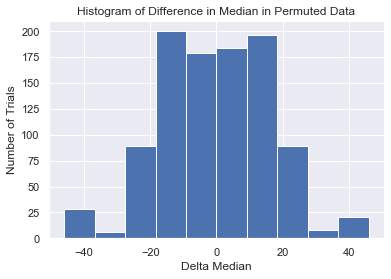

In [136]:
n,bins,patches=plt.hist(median_list)
plt.xlabel('Delta Median')
plt.ylabel('Number of Trials')
plt.title('Histogram of Difference in Median in Permuted Data')
plt.show()

In [131]:
median_array = np.array(median_list)
print(len(median_array[abs(median_array)>15]))

478


# Wilcoxon-Mann-Whitney Example

In [43]:
GroupA = [100,101,102,103]
GroupB = [0,1,2,3]
print(st.mannwhitneyu(GroupA,GroupB))
print(st.ttest_ind(GroupA,GroupB,equal_var = False))


MannwhitneyuResult(statistic=0.0, pvalue=0.015191410988288745)
Ttest_indResult(statistic=109.54451150103321, pvalue=3.9011276576104784e-11)


In [22]:
?st.mannwhitneyu

In [141]:
?st.wilcoxon

## Let's Compare Wilcoxon-Mann-Whitney U to a t-test:

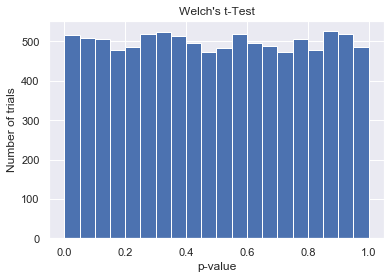

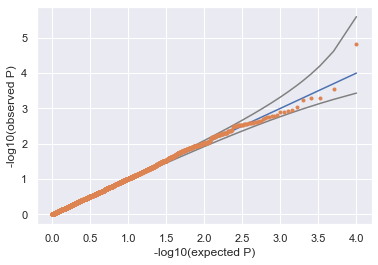

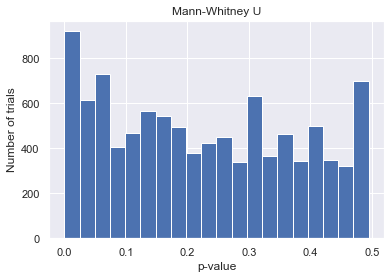

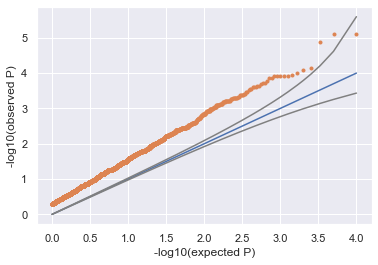

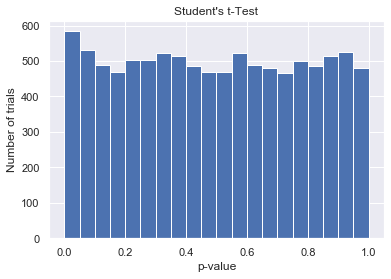

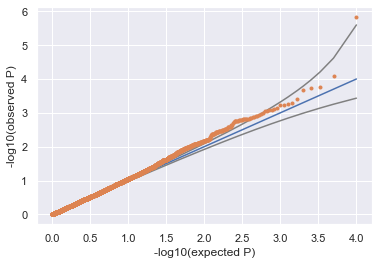

In [122]:
#Under the null:

num_tests = 10000
pvalue_t_welch_list = []
pvalue_t_student_list = []
pvalue_u_list = []
for i in range(num_tests):
    dataA = st.norm.rvs(loc=0,scale=1,size=20)
    dataB = st.norm.rvs(loc=0,scale=10,size=20) #The mean for dataB is now different from dataA
    statistic_t_welch, pvalue_t_welch = st.ttest_ind(dataA,dataB,equal_var = False)
    statistic_u, pvalue_u = st.mannwhitneyu(dataA,dataB)
    statistic_t_student, pvalue_t_student = st.ttest_ind(dataA,dataB,equal_var = True)
    pvalue_t_welch_list.append(pvalue_t_welch)
    pvalue_u_list.append(pvalue_u)
    pvalue_t_student_list.append(pvalue_t_student)

n, bins, patches = plt.hist(pvalue_t_welch_list,20)
plt.xlabel('p-value')
plt.ylabel('Number of trials')
plt.title("Welch's t-Test")
plt.show()

qqPlot(pvalue_t_welch_list)


n, bins, patches = plt.hist(pvalue_u_list,20)
plt.xlabel('p-value')
plt.ylabel('Number of trials')
plt.title("Mann-Whitney U")
plt.show()

qqPlot(pvalue_u_list)

n, bins, patches = plt.hist(pvalue_t_student_list,20)
plt.xlabel('p-value')
plt.ylabel('Number of trials')
plt.title("Student's t-Test")
plt.show()

qqPlot(pvalue_t_student_list)




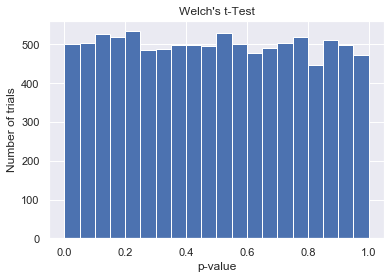

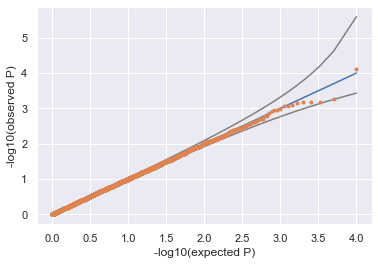

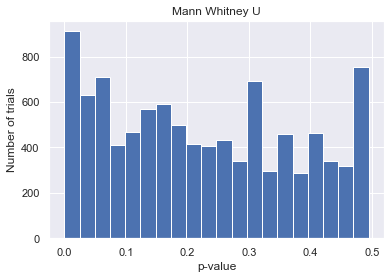

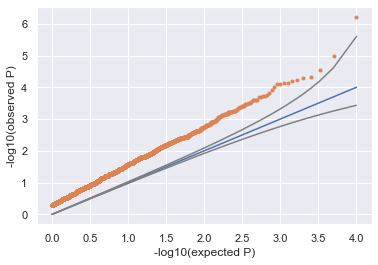

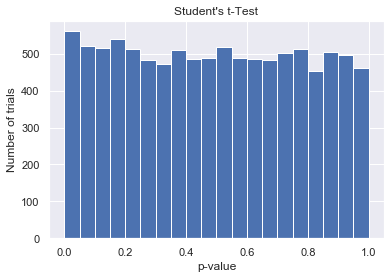

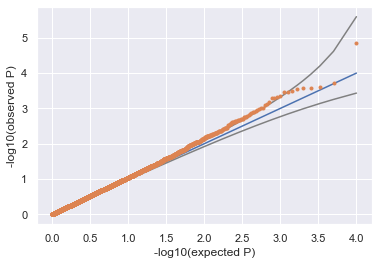

In [123]:
#Under the alternate:

num_tests = 10000
pvalue_t_welch_list = []
pvalue_t_student_list = []
pvalue_u_list = []
for i in range(num_tests):
    dataA = st.norm.rvs(loc=0,scale=1,size=20)
    dataB = st.norm.rvs(loc=0.25,scale=10,size=20) #The mean for dataB is now different from dataA
    statistic_t_welch, pvalue_t_welch = st.ttest_ind(dataA,dataB,equal_var = False)
    statistic_u, pvalue_u = st.mannwhitneyu(dataA,dataB)
    statistic_t_student, pvalue_t_student = st.ttest_ind(dataA,dataB,equal_var = True)
    pvalue_t_welch_list.append(pvalue_t_welch)
    pvalue_u_list.append(pvalue_u)
    pvalue_t_student_list.append(pvalue_t_student)

n, bins, patches = plt.hist(pvalue_t_welch_list,20)
plt.xlabel('p-value')
plt.ylabel('Number of trials')
plt.title("Welch's t-Test")
plt.show()

qqPlot(pvalue_t_welch_list)


n, bins, patches = plt.hist(pvalue_u_list,20)
plt.xlabel('p-value')
plt.ylabel('Number of trials')
plt.title("Mann Whitney U")
plt.show()

qqPlot(pvalue_u_list)

n, bins, patches = plt.hist(pvalue_t_student_list,20)
plt.xlabel('p-value')
plt.ylabel('Number of trials')
plt.title("Student's t-Test")
plt.show()

qqPlot(pvalue_t_student_list)



## Let's Try An Exponential Function

In [108]:
st.expon.rvs(loc=0,scale=1,size=20)

array([1.19010924, 2.27233596, 1.15040261, 0.62613509, 0.54466215,
       2.26251076, 0.79872226, 0.14629384, 0.51035113, 0.36833425,
       1.05829746, 2.05771306, 0.33098146, 0.84299887, 3.20564288,
       3.43296448, 0.3551016 , 0.81313112, 0.03195119, 0.14597515])

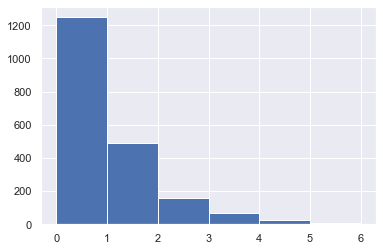

In [112]:
plt.hist(st.expon.rvs(loc=0,scale=1,size=2000),bins=np.arange(0,7,1))
plt.show()

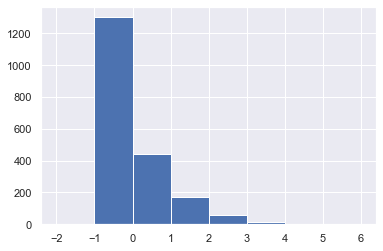

In [114]:
plt.hist(st.expon.rvs(loc=-1,scale=1,size=2000),bins=np.arange(-2,7,1))
plt.show()

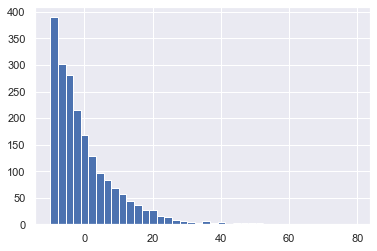

In [117]:
n, bins, patches = plt.hist(st.expon.rvs(loc=-10,scale=10,size=2000),40)

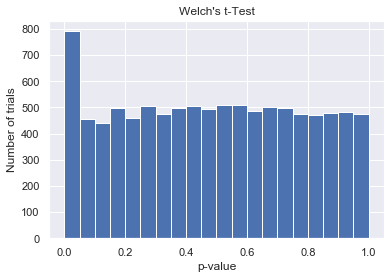

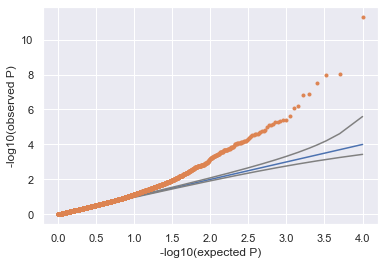

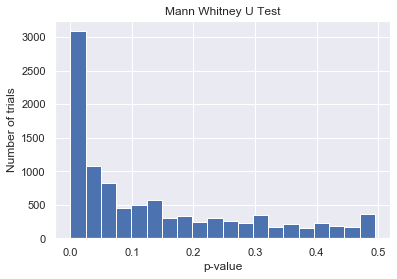

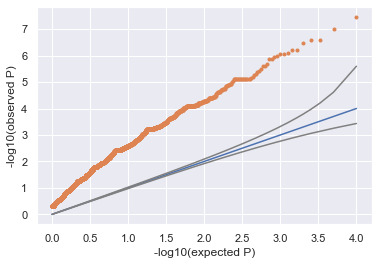

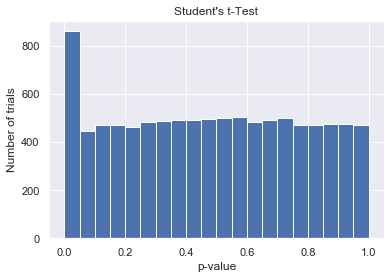

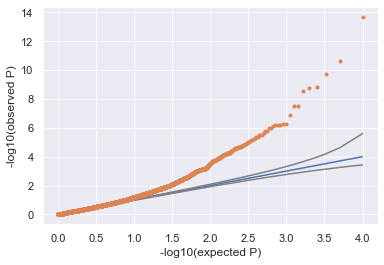

In [124]:
#Test under the null

num_tests = 10000
pvalue_t_welch_list = []
pvalue_t_student_list = []
pvalue_u_list = []
for i in range(num_tests):
    dataA = st.expon.rvs(loc=-1,scale=1,size=20) #Mean 0
    dataB = st.expon.rvs(loc=-10,scale=10,size=20) #Mean 0
    statistic_t_welch, pvalue_t_welch = st.ttest_ind(dataA,dataB,equal_var = False)
    statistic_u, pvalue_u = st.mannwhitneyu(dataA,dataB)
    statistic_t_student, pvalue_t_student = st.ttest_ind(dataA,dataB,equal_var = True)
    pvalue_t_welch_list.append(pvalue_t_welch)
    pvalue_u_list.append(pvalue_u)
    pvalue_t_student_list.append(pvalue_t_student)

n, bins, patches = plt.hist(pvalue_t_welch_list,20)
plt.xlabel('p-value')
plt.ylabel('Number of trials')
plt.title("Welch's t-Test")
plt.show()

qqPlot(pvalue_t_welch_list)


n, bins, patches = plt.hist(pvalue_u_list,20)
plt.xlabel('p-value')
plt.ylabel('Number of trials')
plt.title("Mann Whitney U Test")
plt.show()

qqPlot(pvalue_u_list)

n, bins, patches = plt.hist(pvalue_t_student_list,20)
plt.xlabel('p-value')
plt.ylabel('Number of trials')
plt.title("Student's t-Test")
plt.show()

qqPlot(pvalue_t_student_list)




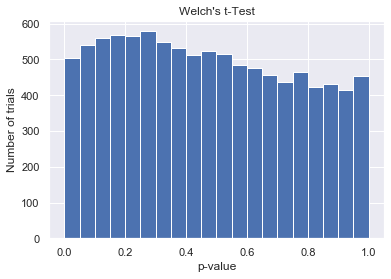

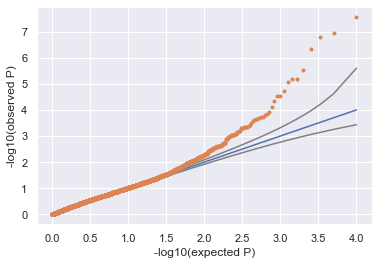

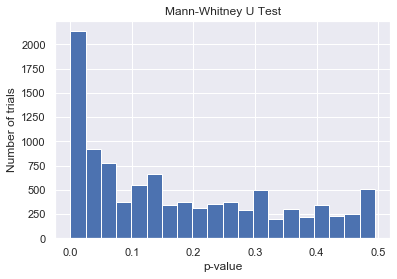

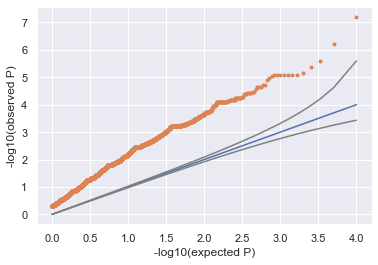

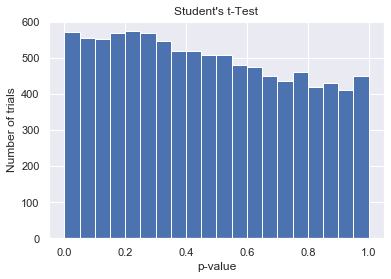

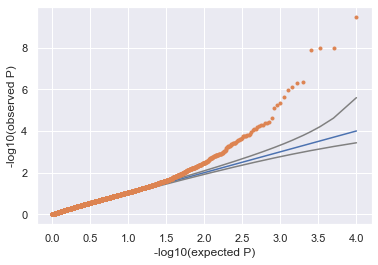

In [125]:
#Test under the null

num_tests = 10000
pvalue_t_welch_list = []
pvalue_t_student_list = []
pvalue_u_list = []
for i in range(num_tests):
    dataA = st.expon.rvs(loc=-1,scale=1,size=20) #Mean 0
    dataB = st.expon.rvs(loc=-10,scale=11,size=20) #Mean 0
    statistic_t_welch, pvalue_t_welch = st.ttest_ind(dataA,dataB,equal_var = False)
    statistic_u, pvalue_u = st.mannwhitneyu(dataA,dataB)
    statistic_t_student, pvalue_t_student = st.ttest_ind(dataA,dataB,equal_var = True)
    pvalue_t_welch_list.append(pvalue_t_welch)
    pvalue_u_list.append(pvalue_u)
    pvalue_t_student_list.append(pvalue_t_student)

n, bins, patches = plt.hist(pvalue_t_welch_list,20)
plt.xlabel('p-value')
plt.ylabel('Number of trials')
plt.title("Welch's t-Test")
plt.show()

qqPlot(pvalue_t_welch_list)


n, bins, patches = plt.hist(pvalue_u_list,20)
plt.xlabel('p-value')
plt.ylabel('Number of trials')
plt.title("Mann-Whitney U Test")
plt.show()

qqPlot(pvalue_u_list)

n, bins, patches = plt.hist(pvalue_t_student_list,20)
plt.xlabel('p-value')
plt.ylabel('Number of trials')
plt.title("Student's t-Test")
plt.show()

qqPlot(pvalue_t_student_list)



